<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_2_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

![](https://datascience.foundation/img/pdf_images/understanding_of_linear_regression_with_python_1.png)

### 1.Load Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
np.random.seed(2021) # for choose same data for Model training

### 2.Read the data

In [ ]:
data = pd.read_csv('https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### 3.Mapping with X and Y format
* X1 => Gender
* X2 => Height
* Y => Weight

### 4.Number of Rows and Columns


In [ ]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 10000
Number of Columns: 3


### 5.Check the data types of Features

In [ ]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

### 6.Basic Statistics Checking

In [ ]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


### 7.Basic Data Exploration and Normalization Checking

0.04936908937689032


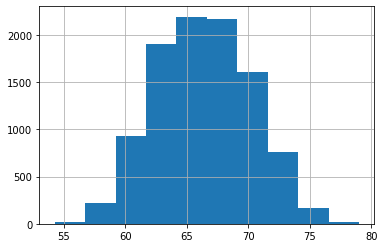

In [ ]:
data["Height"].hist()
print(data["Height"].skew())

0.03295450444592437


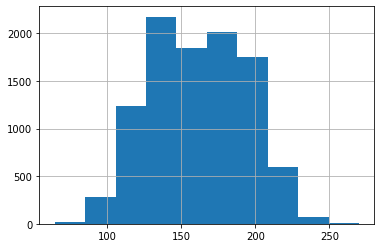

In [ ]:
data["Weight"].hist()
print(data["Weight"].skew())

### 8.Missing value checking

In [ ]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### 9.Check the Correlation

In [ ]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


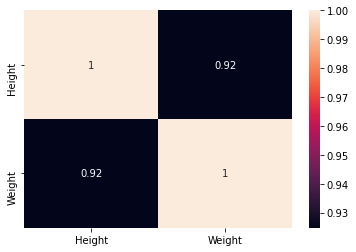

In [ ]:
sns.heatmap(data.corr(), annot=True)

### 10.X and Y Seperate

In [ ]:
X = data["Height"].values.reshape(-1,1)
y = data["Weight"].values

In [ ]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(8000, 1)
(2000, 1)
(8000,)
(2000,)


### 11.Simple Linear Regresssion

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train) # Model Training 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X_train,y_train)

0.8545053200432668

In [ ]:
lr.coef_

array([7.70218561])

In [ ]:
lr.intercept_

-349.7878205824451

### 12.Model Prediction

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
       166.78470522, 101.81227499])

In [19]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### 13.Regression Plot predicted by Model

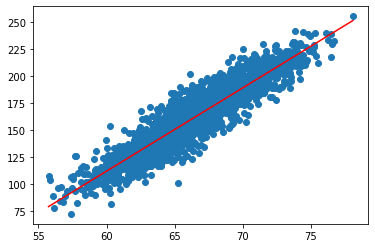

In [ ]:
plt.scatter(X_test, y_test) 
plt.plot([min(X_test), max(X_test)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

### 13.Model Evaluation

In [ ]:
rmse(y_test, y_pred)

12.206699151878908

In [ ]:
#display adjusted R-squared
1 - (1-lr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.8544871286604265

In [ ]:
from sklearn.metrics import *

In [ ]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(9.691933801884572, 149.00350418448127, 0.8577317777038499)

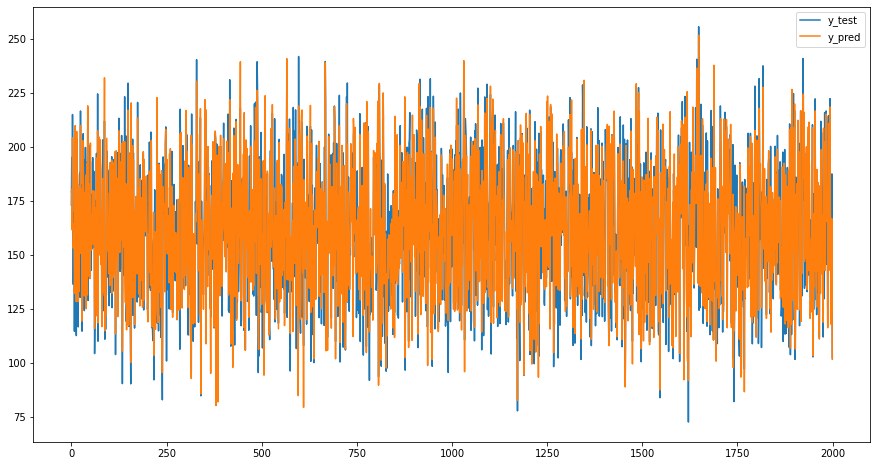

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test', 'y_pred'])
plt.show()

# Multiple Linear Regression
![](https://miro.medium.com/max/1662/1*39FkA9sgT6E_txFT_KANjw.png)

### 1.Download Dataset

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2021-04-06 09:54:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   505KB/s    in 0.5s    

2021-04-06 09:54:54 (505 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



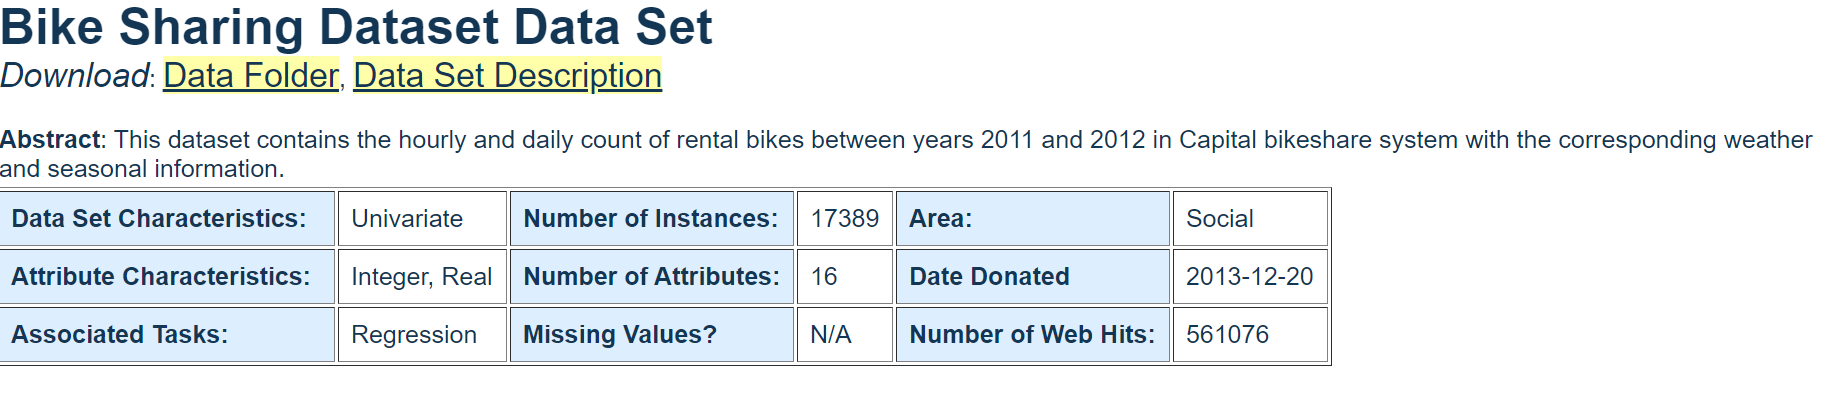

### **2.Data Set Information:**

* Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

* Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

> **Attribute Information:**

* Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
import shutil
shutil.unpack_archive("/content/Bike-Sharing-Dataset.zip", ".")

### 3.Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression 

### 4.Read data

In [4]:
hour = pd.read_csv("/content/hour.csv")
day = pd.read_csv("/content/day.csv")

### 5.Display Data

In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 6.Count Total Rows and Columns

In [7]:
print("Rows :",day.shape[0])
print("Columns :", day.shape[1])

Rows : 731
Columns : 16


### 7.Check Descriptive Statistics

In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 8.Check Datatypes of the All Features

In [9]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### 9.Check Correlation and Multicolkinearity

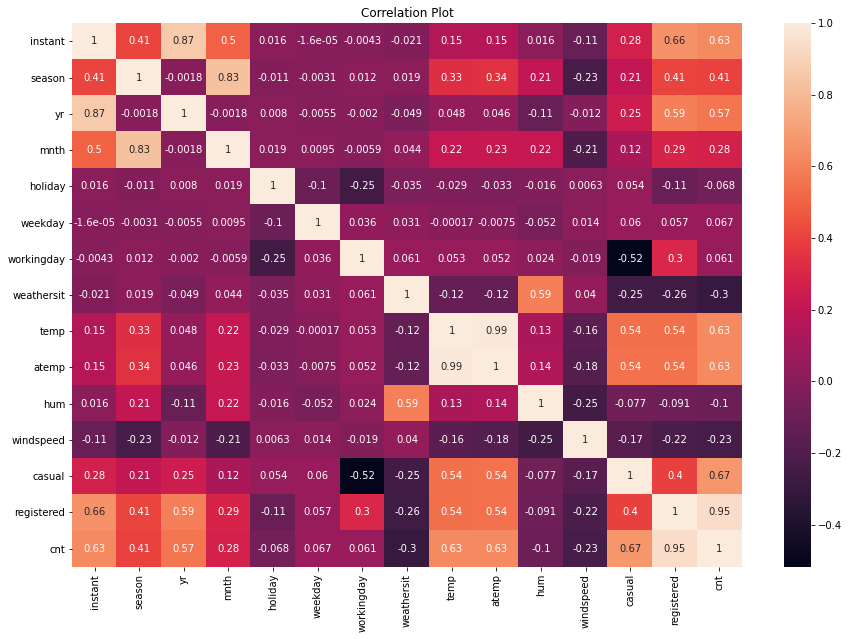

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(day.corr(), annot=True)
plt.title("Correlation Plot")
plt.show()

### 10. Extract the Columns that impact on target

In [10]:
corr_cols = ['instant','yr','temp', 'atemp', 'casual', 'registered']
X = day[corr_cols]
y = day['cnt']

### 11.Split the data into train and testt

In [12]:
X.shape, y.shape

((731, 6), (731,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(584, 6)
(147, 6)
(584,)
(147,)


### 12. MultiLinear Regression Model training and  Evaluation

In [20]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Training R Score : ",mlr.score(X_train, y_train))
print("Testing R Score: ", mlr.score(X_test, y_test))
print("RMSE :", rmse(y_test, mlr.predict(X_test)))

Training R Score :  1.0
Testing R Score:  1.0
RMSE : 1.6616567233391897e-12


### 13.Predict the result

In [21]:
y_pred = mlr.predict(X_test)
result = pd.DataFrame()
result["Y_Actual"] = y_test
result["Y_pred"] = y_pred
result

,Y_Actual,Y_pred
703,6606,6606.0
33,1550,1550.0
300,3747,3747.0
456,6041,6041.0
633,7538,7538.0
...,...,...
70,2132,2132.0
192,4258,4258.0
328,2792,2792.0
165,5180,5180.0


### 13.Result Analysis on X vs Ypred Plot

[[1.         0.63582213]
 [0.63582213 1.        ]]


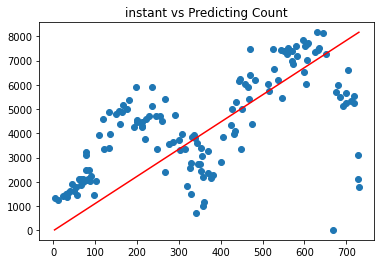

[[1.         0.62211024]
 [0.62211024 1.        ]]


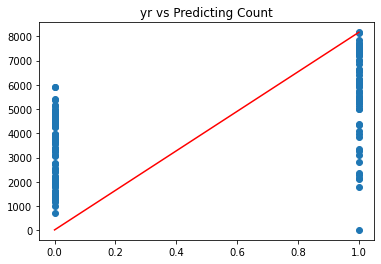

[[1.        0.6388457]
 [0.6388457 1.       ]]


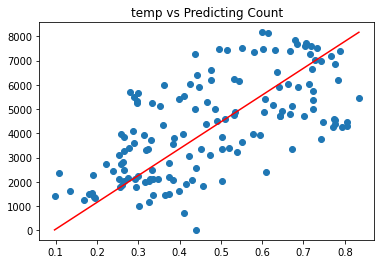

[[1.         0.64529942]
 [0.64529942 1.        ]]


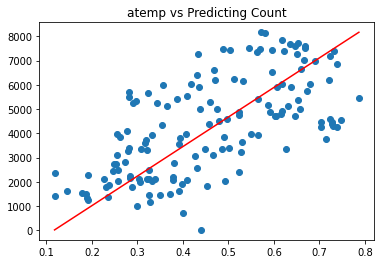

[[1.         0.66337518]
 [0.66337518 1.        ]]


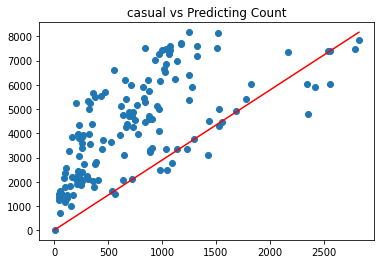

[[1.         0.95938343]
 [0.95938343 1.        ]]


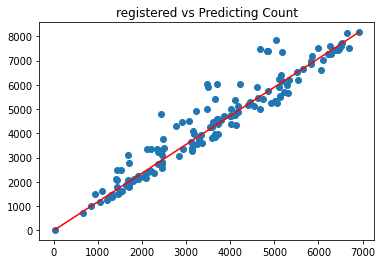

In [24]:
for i in X_test.columns.tolist():
  plt.scatter(X_test[i], y_test) 
  print(np.corrcoef(X_test[i], y_pred))
  plt.plot([min(X_test[i]), max(X_test[i])], [min(y_pred), max(y_pred)], color='red')  # regression line
  plt.title(f"{i} vs Predicting Count")
  plt.show()

In [25]:
weights = mlr.coef_.tolist()
cols = X.columns

In [26]:
print("Y(cnt) = ", end = " " )
for x, w in zip(cols, weights):
  print(f"({x}) * {w}", end=" + ")
print(f"({mlr.intercept_})", end=" ")

Y(cnt) =  (instant) * -9.864707531115842e-16 + (yr) * 4.68070027181966e-13 + (temp) * 1.284896830860277e-12 + (atemp) * 5.137537954330281e-12 + (casual) * 1.0 + (registered) * 1.0000000000000004 + (-4.547473508864641e-12) 

# Polynomial Regression
  - Power of the **Independent variable is more than 1** It's known as polynomial regression.
  - **Polynomial regression** is a regression analysis in which the relationship between the independent variable(features , $X$) and the dependent variable(Label, $y$) in the nth degree($X^2, X^3, X^n$) polynomial.

  ![](https://miro.medium.com/max/573/1*fU8Q4gAN-MHK-LAsWSDjjQ.jpeg)

  - **Polynomial Regression** is a significant case of Linear Regression where we are **training(fitting)** the _polynomial equation_ on the data with a **curvilinear relationship** between the dependent($y$) and independent variables($X$).
  ![](https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png)

**Assumptions of Polynomial Regression** :  

---
  * The behavior of a dependent variable($y$) can be explained by a **linear**, or **curvilinear**, additive relationship between the dependent variable($y$) and a set of k independent variables($X$)
  * The independent variables($X$) are independent of each other.
  * The errors are independent, normally distributed with mean zero and a constant variance (OLS).


**How to know Polynomial regression need to use?**    

---
* In above plot we can see that green point has _curvilinear type of shape_ they are designing naturally which means that simple linear regression is not helping at all in any condition to solve this type of problem, that case we have to follow **polynomial regression.**
* Polynomial Regression does not require the relationship between the independent($y$) and dependent variables($X$) to be linear in the data set,This is also one of the main difference between the **Linear and Polynomial Regression.**
> Note : $$``As\ we\ increase\ the\ degree\ in\ the\ model\,\it\ tends\ to\ increase\ the\ performance\ of\ the\ model. However,\ increasing\ the\ degrees\ of\ the\ model\ also\ increases\ the\ risk\ of\ over-fitting\ and\ under-fitting\ the\ data."\$$






In [27]:
# Download Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

--2021-04-06 10:59:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   307KB/s    in 0.3s    

2021-04-06 10:59:39 (307 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2021-04-06 10:59:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[======

Data related Information from this link : [Link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

In [31]:
wwin = pd.read_csv("winequality-red.csv", sep=";")

In [32]:
wwin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
wwin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
wwin.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


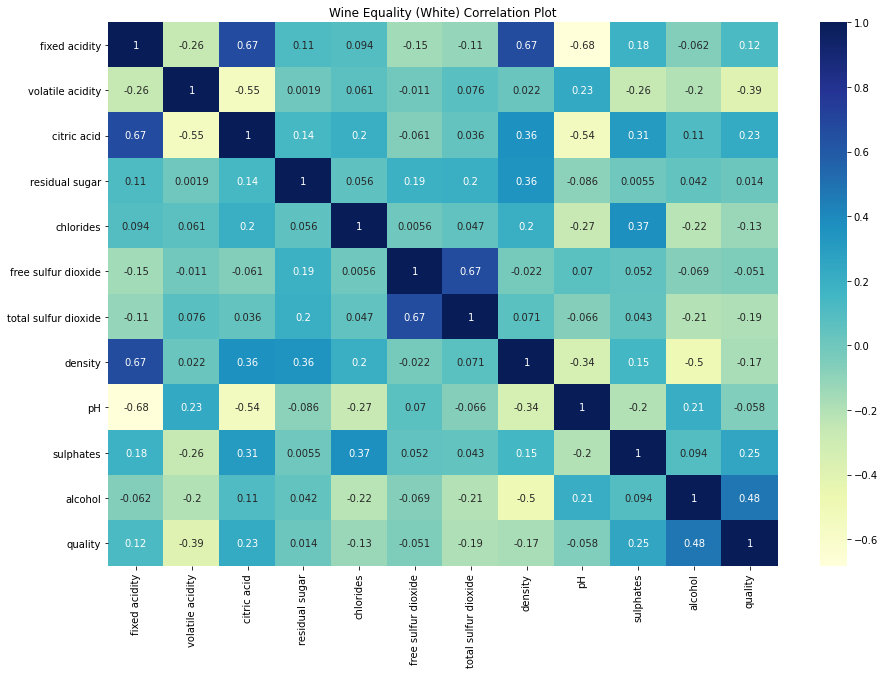

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(wwin.corr(), annot=True, cmap="YlGnBu")
plt.title("Wine Equality (White) Correlation Plot")
plt.show()

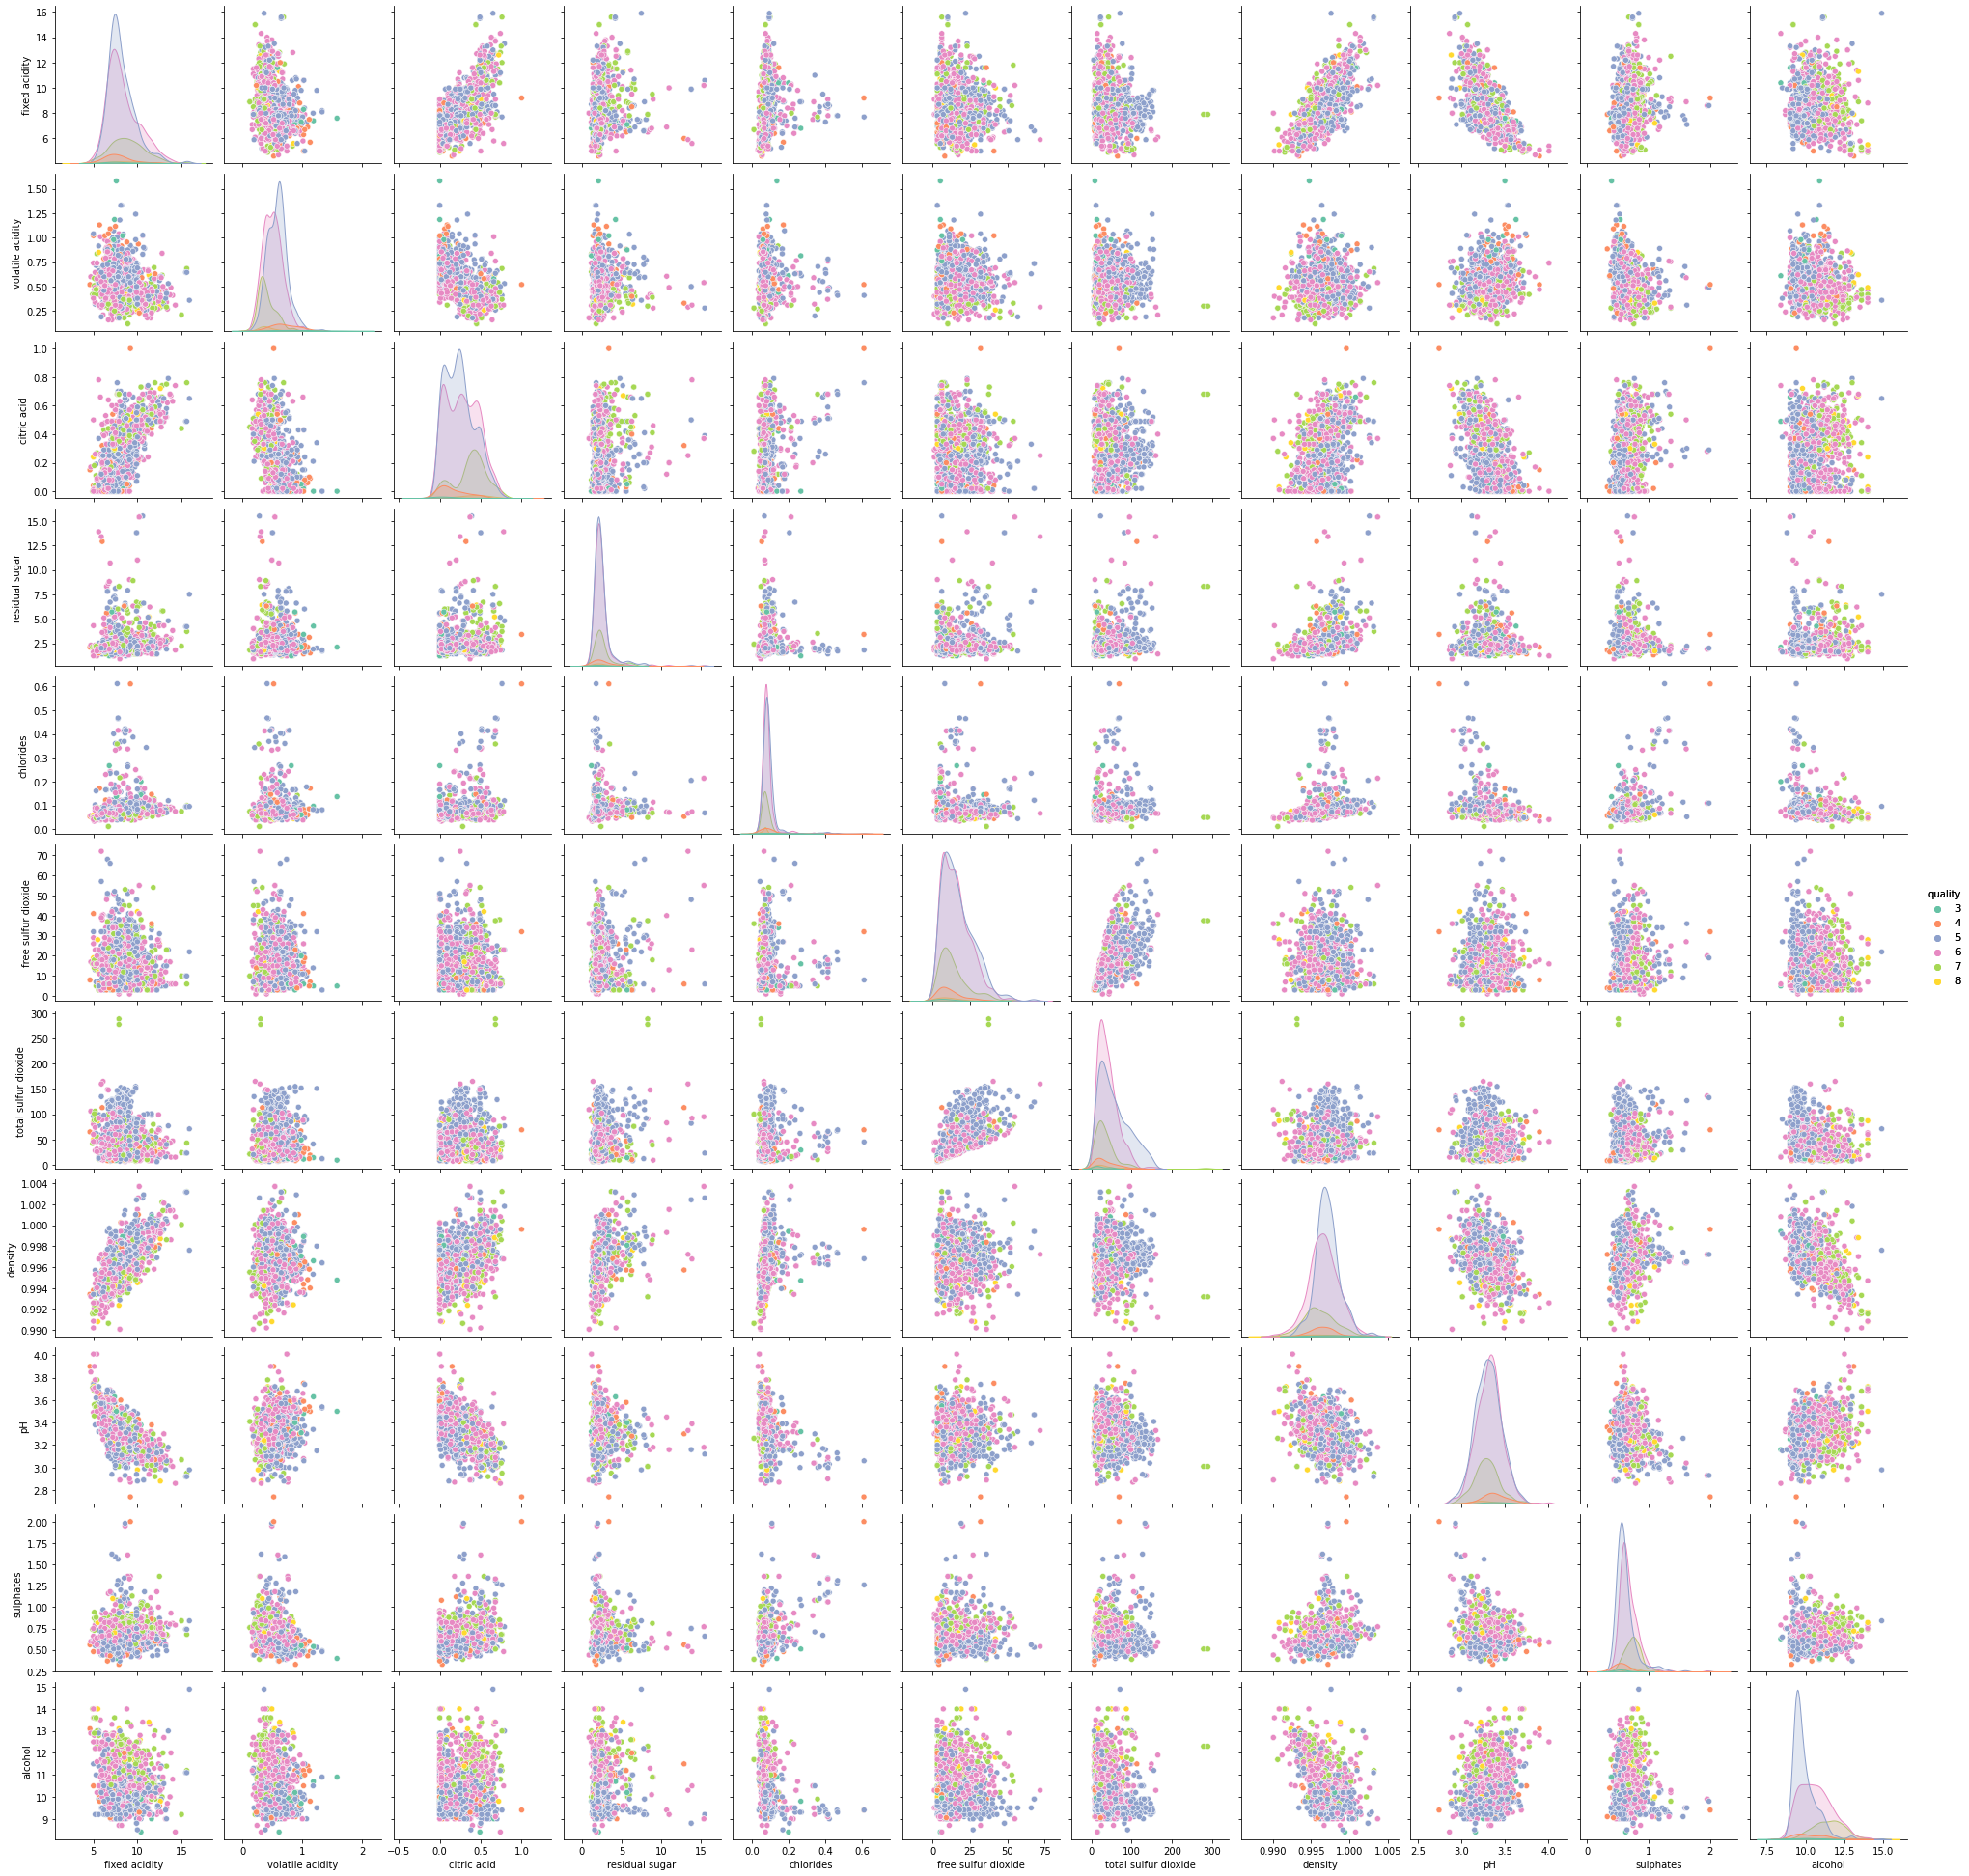

In [48]:
g = sns.pairplot(wwin, hue="quality", palette="Set2", diag_kind="kde", height=2.5)
g.add_legend()

* We can see that data is very scatter and not normal. So, we can directly apply Polynomial regression.

In [51]:
# Split data in to X and y
X = wwin.iloc[:, :11]
y = wwin.iloc[:, 11]

In [79]:
# Print the shape of X and y
X.shape, y.shape

((1599, 11), (1599,))

In [97]:
# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [86]:
# Model training before polynomial feature generation
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Training R Score : ",mlr.score(X_train, y_train))
print("Testing R Score: ", mlr.score(X_test, y_test))
print("RMSE :", rmse(y_test, mlr.predict(X_test)))

y_pred = mlr.predict(X_test)
result_lr = pd.DataFrame()
result_lr["Y_Actual"] = y_test
result_lr["Y_pred"] = y_pred
result_lr.head()

Training R Score :  0.30848604554498016
Testing R Score:  0.22018787866663683
RMSE : 0.7138709900976515


,Y_Actual,Y_pred
803,6,5.353971
124,5,5.096662
350,6,5.558197
682,5,5.809361
1326,6,5.711213


* Fitting Polynomial Regression to the dataset Fitting the Polynomial Regression model on two components X and y.

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 

In [82]:
X_poly = pd.DataFrame(X_poly)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(1279, 78)
(320, 78)
(1279,)
(320,)


In [84]:
# Model training after Poly nomial feature generation
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Training R Score : ",mlr.score(X_train, y_train))
print("Testing R Score: ", mlr.score(X_test, y_test))
print("RMSE :", rmse(y_test, mlr.predict(X_test)))

Training R Score :  0.30848604554498016
Testing R Score:  0.22018787866663683
RMSE : 0.7138709900976515


In [85]:
y_pred = mlr.predict(X_test)
result = pd.DataFrame()
result["Y_Actual"] = y_test
result["Y_pred"] = y_pred
result

,Y_Actual,Y_pred
803,6,5.353971
124,5,5.096662
350,6,5.558197
682,5,5.809361
1326,6,5.711213
...,...,...
1259,6,5.557030
1295,5,5.500520
1155,5,5.163849
963,6,6.625829


# Lesso Regression($L1\ Normalization$)

![](https://www.thinkwithdata.org/images/lassocost.png)

* Lasso (Least Absolute Shrinkage and Selection Operator) also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models.  
* Look at the equation below: Lasso regression differs from ridge regression in a way that it uses absolute values in the penalty function, instead of squares. 
* This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. 
* Larger the penalty applied, further the estimates get shrunk towards absolute zero. This results to variable selection out of given n variables.
* In ridge regression, we improved on linear regression by adding a penalty term to help make our coefficients more stable. 
* **_Ridge regression utilized L2 regularization while LASSO regression uses L1 regularization._** 
* LASSO regression adds feature selection in the mix, which means it can make certain coefficients or weights zero, thereby removing them and selecting the others. To see how this works, let's look at the LASSO cost function.

In [98]:
# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [99]:
# Model training after Poly nomial feature generation
from sklearn.linear_model import Lasso

lesso = Lasso()
lesso.fit(X_train, y_train)

print("Training R Score : ",lesso.score(X_train, y_train))
print("Testing R Score: ", lesso.score(X_test, y_test))
print("RMSE :", rmse(y_test, lesso.predict(X_test)))
print("Weights : ", lesso.coef_)
print("Intercept : ", lesso.intercept_)

Training R Score :  0.03860915306601188
Testing R Score:  0.009014670905063582
RMSE : 0.8047451268061235
Weights :  [ 0.         -0.          0.          0.         -0.          0.
 -0.00397837 -0.         -0.          0.          0.        ]
Intercept :  5.809544459115708


# Ridge Regresson($L2\ Normalization$)

![](https://www.thinkwithdata.org/images/ridgecost.png)

* Ridge Regression is a technique used when the data suffers from multicollinearity (independent variables are highly correlated). 
* In multicollinearity, even though the least squares estimates (OLS) are unbiased, their variances are large which deviates the observed value far from the true value. 
* By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
* When using linear regression, especially with small datasets, the chance of overfitting your model is high. This is because although there is low bias, with a smaller training set, the variability in how your model performs on testing sets will increase. 
* In order to counter overfitting, we can use various regularization techniques used by Ridge and LASSO regression. 
* They pretty much work by introducing some bias in the model in order to lower the variability of how the model performs on test sets. 
* This is especially useful when the coefficients in your linear regression model are far apart. This is where Ridge Regression comes in.
* **_Ridge Regression uses something called L2 Regularization._** 
* Regularization is used to reduce overfitting. 
* L2 Regularization reduces model complexity and helps bring the weights in our model closer to zero, in essence, decreasing variance and shifting us more left on the bias-variance curve. 
* If you're confused, take a look here. Linear Regression is prone to overfitting and high variance, what we can do to counter that is to introduce bias. In return for adding bias, our model has decreased variance.
* A traditional linear regression model minimizes the sum of squared residuals, whereas in ridge regression, the sum of squared residuals plus a λ times the sum of the coefficients squared is minimized. You can think of this as a penalty term.

In [100]:
# Model training after Poly nomial feature generation
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

print("Training R Score : ",ridge.score(X_train, y_train))
print("Testing R Score: ", ridge.score(X_test, y_test))
print("RMSE :", rmse(y_test, ridge.predict(X_test)))
print("Weights : ", ridge.coef_)
print("Intercept : ", ridge.intercept_)

Training R Score :  0.34694185133904765
Testing R Score:  0.3987064350775855
RMSE : 0.6268563375138515
Weights :  [ 1.96137645e-02 -1.02152929e+00 -1.64270261e-01  6.23679545e-04
 -1.22677375e+00  5.68588748e-03 -3.56053037e-03 -1.11526006e-02
 -3.76222673e-01  7.46955766e-01  2.97591067e-01]
Intercept :  3.8938654804528974


# Stepwise Regression(LARLesso)

* **Stepwise regression** is the step-by-step iterative construction of a regression model that involves the selection of independent variables($X$) to be used in a final model.
* Stepwise regression is a way to build a model by adding or removing predictor variables, usually via a series of **F-tests or T-tests.** The variables to be added or removed are chosen based on the test statistics of the estimated coefficients.
*  Stepwise either adds the most significant variable or removes the least significant variable. It does not consider all possible models, and it produces a single regression model when the algorithm ends.
* A **fundamental problem with stepwise regression** is that some real explanatory variables that have causal effects on the dependent variable($y$) may happen to not be statistically significant, while nuisance variables may be coincidentally significant.









In [101]:
# Model training after Poly nomial feature generation
from sklearn.linear_model import LassoLars

stepwise = LassoLars()
stepwise.fit(X_train, y_train)

print("Training R Score : ",stepwise.score(X_train, y_train))
print("Testing R Score: ", stepwise.score(X_test, y_test))
print("RMSE :", rmse(y_test, stepwise.predict(X_test)))
print("Weights : ", stepwise.coef_)
print("Intercept : ", stepwise.intercept_)

Training R Score :  0.0
Testing R Score:  -0.005591701339940912
RMSE : 0.8106540994558193
Weights :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept :  5.623924941360438


# BayesRegression

* Which is combination of Ridge + Lasso Regression
* Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.
* This can be done by introducing uninformative priors over the hyper parameters of the model. The $l_2$ regularization used in Ridge regression and classification is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the coefficients $w$ with $\lambda^-1\$precision . Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.

In [102]:
# Model training after Poly nomial feature generation
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train)

print("Training R Score : ",br.score(X_train, y_train))
print("Testing R Score: ", br.score(X_test, y_test))
print("RMSE :", rmse(y_test, br.predict(X_test)))
print("Weights : ", br.coef_)
print("Intercept : ", br.intercept_)

Training R Score :  0.34652877217618827
Testing R Score:  0.3976681363057873
RMSE : 0.6273973240399038
Weights :  [ 2.06310753e-02 -1.01898939e+00 -1.63663095e-01  2.55978485e-04
 -1.11598062e+00  5.69587774e-03 -3.54540924e-03 -9.16860682e-03
 -3.61820193e-01  7.30247914e-01  2.98760717e-01]
Intercept :  3.823329283198821


# References
1. https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
2. https://scikit-learn.org/stable/modules/linear_model.htmlhttps://scikit-learn.org/stable/modules/linear_model.html
3. https://statisticsbyjim.com/regression/guide-stepwise-best-subsets-regression/